In [1]:
# carichiamo e plottiamo 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def theta_teorico(theta0, omega0, g, L, t):
    return theta0*np.cos(t*np.sqrt(g/L))+omega0*np.sin(t*np.sqrt(g/L))/np.sqrt(g/L)

def omega_Teorico(theta0, omega0, g, L, t):
    return -theta0*np.sqrt(g/L)*np.sin(np.sqrt(g/L)*t) + omega0*np.cos(np.sqrt(g/L)*t)

def energia_cinetica(omegat, M, L):
    return 0.5*M*L**2*omegat**2

def energia_potenziale(thetat, g, M, L):
    return M*g*L*(1-np.cos(thetat))


data = np.loadtxt('out_pendolo0_1.csv')

time = data[:,1]
theta = data[:,2]
omega=data[:,3]
alpha=data[:,4]

thetaTh=[]
omegaTh=[]

en_cinetica=[]
en_potenziale=[]
energia_totale=[]

for t in time:
    thetaTh.append(theta_teorico(theta[0], omega[0], 9.81, 1, t))
    omegaTh.append(omega_Teorico(theta[0], omega[0], 9.81, 1, t))  

e=[]

for i in range(0, len(theta)):
    e.append((thetaTh[i]-theta[i])/max(thetaTh))
    en_cinetica.append(energia_cinetica(omega[i], 1, 1))
    en_potenziale.append(energia_potenziale(theta[i],9.81, 1, 1))
    energia_totale.append(en_cinetica[i]+en_potenziale[i])

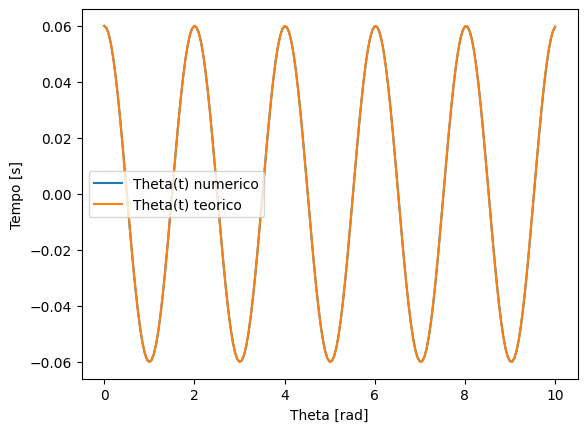

In [3]:
plt.plot(time, theta, label="Theta(t) numerico")
plt.plot(time, thetaTh, label="Theta(t) teorico")
plt.xlabel("Theta [rad]")
plt.ylabel("Tempo [s]")
plt.legend()

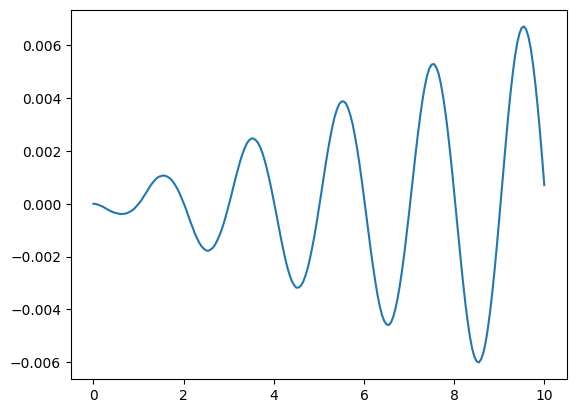

In [4]:
plt.plot(time, e)

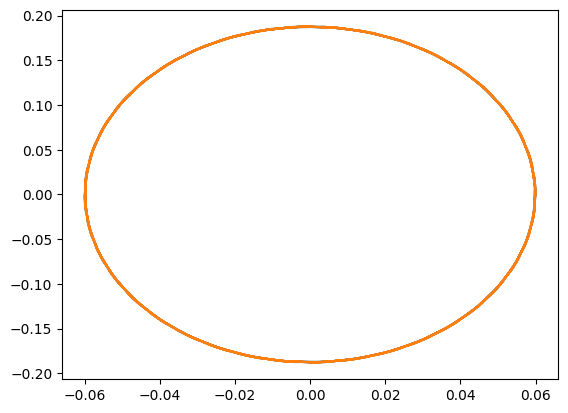

In [5]:
plt.plot(theta, omega)
plt.plot(thetaTh, omegaTh, '-')

[np.float64(0.0176527032356469), np.float64(0.017652578522013167), np.float64(0.01765286100043286), np.float64(0.017652782205378033), np.float64(0.017652573407514232), np.float64(0.01765265144106703), np.float64(0.017652541223927065), np.float64(0.017652726178287528), np.float64(0.01765259365829984), np.float64(0.017652724158475595), np.float64(0.017652724797075962), np.float64(0.01765268672873387), np.float64(0.017652531609690714), np.float64(0.017652696381562378), np.float64(0.017652551238072023), np.float64(0.017652596501523954), np.float64(0.017652775299186484), np.float64(0.017652707345967685), np.float64(0.017652620402444114), np.float64(0.017652923229558873), np.float64(0.017652775983501727), np.float64(0.01765236458044875), np.float64(0.017652511731939297), np.float64(0.017652618225637372), np.float64(0.017652449429864537), np.float64(0.01765272759754416), np.float64(0.01765274137690342), np.float64(0.01765261748960244), np.float64(0.017652579658123627), np.float64(0.0176526381

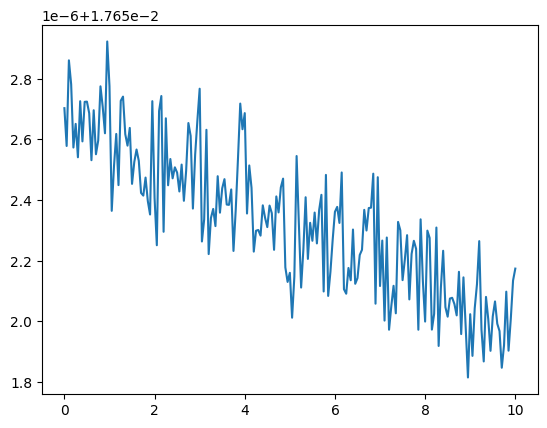

In [6]:
energia_totale_teorica=energia_cinetica(omega[0], 1, 1)+energia_potenziale(theta[0], 9.81, 1,1)
plt.plot(time, energia_totale)

print(energia_totale)
print(energia_totale_teorica)
print(max(energia_totale)-min(energia_totale))
